In [5]:
#importing libraries
import numpy as num
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
maildata=pd.read_csv("C:\\Users\\deept\\Desktop\\Email_Spam_Detection\\Email Spam Detection\\spam.csv", encoding=('ISO-8859-1'))

In [7]:
maildata = maildata.loc[:, ~maildata.columns.str.contains('^Unnamed')]

In [8]:
print(maildata.shape)

(5572, 2)


In [9]:
maildata.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
print(maildata)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [11]:
#label spam mail as 0 and ham mail as 1
maildata.loc[maildata['Category']=='spam','Category']=0
maildata.loc[maildata['Category']=='ham','Category']=1

In [12]:
P=maildata['Message']
Q=maildata['Category']

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

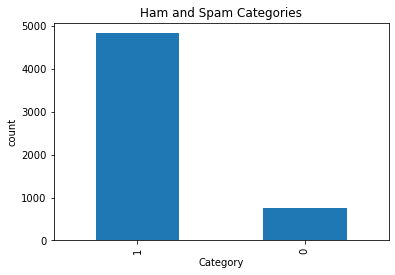

In [13]:
maildata['Category'].value_counts().plot(kind="bar")
plt.title("Ham and Spam Categories")
plt.xlabel("Category")
plt.ylabel("count")
sns.despine

In [14]:
#splitting data - train and test
P_train, P_test, Q_train, Q_test = train_test_split(P,Q, test_size=0.2, random_state=3)
print(P.shape)
print(P_train.shape)
print(P_test.shape)

(5572,)
(4457,)
(1115,)


In [15]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase='True')
P_train_features=feature_extraction.fit_transform(P_train)
P_test_features=feature_extraction.transform(P_test)
Q_train=Q_train.astype('int')
Q_test=Q_test.astype('int')

In [16]:
print(P_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [17]:
print(P_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [18]:
#training model
myModel=LogisticRegression()
myModel.fit(P_train_features, Q_train)

LogisticRegression()

In [19]:
#Evaluating training model
predict_on_trained_data=myModel.predict(P_train_features)
accuracy_on_training_data=accuracy_score(Q_train,predict_on_trained_data)
print("Accuracy on training data:" ,accuracy_on_training_data )

Accuracy on training data: 0.9661207089970832


In [20]:
predict_on_test_data=myModel.predict(P_test_features)
accuracy_on_test_data=accuracy_score(Q_test,predict_on_test_data)
print("Accuracy on test data:" ,accuracy_on_test_data )

Accuracy on test data: 0.9623318385650225


In [21]:
#Evaluating the model by checking for a random mail
input_mail=["Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?"]
input_data_features=feature_extraction.transform(input_mail)
prediction=myModel.predict(input_data_features)
if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail
